In [14]:
# imoprt libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# from glob import glob # allows us to list all files to a directory
# import IPython
# import IPython.display as ipd # to play the Audio Files

# import librosa # main package for working with Audio Data
# import librosa.display
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as Pipe
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [15]:
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [16]:
# import labelencoder and scaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
encoder = LabelEncoder()
scaler = StandardScaler()

In [17]:
rng=2023

In [18]:
def data_quality(df):
    
    # find datatype of each column
    data_types = pd.DataFrame(df.dtypes, columns=['Data Type'])

    # count number of missing observations by column
    missing_data_counts = pd.DataFrame(df.isnull().sum(), columns=['Missing Values'])

    # count number of present observations by column
    present_data_counts = pd.DataFrame(df.count(), columns=['Present Values'])

    # count number of unique observations by column
    unique_value_counts = pd.DataFrame(columns=['Unique Values'])
    for v in list(df.columns.values):       
        unique_value_counts.loc[v] = [df[v].nunique()]

    data_quality_report = pd.concat([present_data_counts, missing_data_counts, unique_value_counts], axis=1)
    return data_quality_report

In [19]:
df = pd.read_csv("3593_song_newfeatures_genre_dataset.csv")

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3593 entries, 0 to 3592
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              3593 non-null   int64  
 1   id                      3593 non-null   object 
 2   spectral_centroid_mean  3593 non-null   float64
 3   spectral_centroid_dev   3593 non-null   float64
 4   rolloff_point_mean      3593 non-null   float64
 5   rolloff_point_dev       3593 non-null   float64
 6   flux_mean               3593 non-null   float64
 7   flux_dev                3593 non-null   float64
 8   variability_mean        3593 non-null   float64
 9   variability_dev         3593 non-null   float64
 10  compactness_mean        3593 non-null   float64
 11  compactness_dev         3593 non-null   float64
 12  rms_mean                3593 non-null   float64
 13  rms_dev                 3593 non-null   float64
 14  low_energy_window_mean  3593 non-null   

In [21]:
df.head()

,Unnamed: 0,id,spectral_centroid_mean,spectral_centroid_dev,rolloff_point_mean,rolloff_point_dev,flux_mean,flux_dev,variability_mean,variability_dev,compactness_mean,compactness_dev,rms_mean,rms_dev,low_energy_window_mean,low_energy_window_dev,zero_crossing_mean,zero_crossing_dev,title,genre
0,0,TRBGMOG128F92D75BD,10.30,5.09,0.07,0.05,0.01,0.01,0.01,0.00,1591.00,186.80,0.25,0.08,0.58,0.06,32.60,13.10,b'Kicking And Screaming',Pop_Rock
1,1,TRBGMXY128F92FC2B2,10.30,9.55,0.07,0.08,0.00,0.00,0.00,0.00,1609.00,212.80,0.17,0.08,0.61,0.05,29.88,23.70,b'Black Connect 3',Rap
2,2,TRBGMAW128F4231326,10.68,6.05,0.07,0.04,0.00,0.00,0.00,0.00,1735.00,265.20,0.08,0.07,0.57,0.09,26.56,14.11,b'Terraplane Blues',Country
3,3,TRBGMAZ12903CC3707,8.50,6.65,0.05,0.05,0.00,0.00,0.00,0.00,1665.00,270.70,0.16,0.10,0.57,0.07,24.18,17.22,"b""L'idole des femmes""",Pop_Rock
4,4,TRBGWQG128F92FB42D,17.04,9.34,0.12,0.07,0.00,0.00,0.00,0.00,1629.00,201.10,0.12,0.05,0.58,0.07,46.94,18.85,b'Take The Time',Pop_Rock


In [22]:
df.drop(['Unnamed: 0'], axis=1,inplace=True)

In [23]:
data_quality(df)

,Present Values,Missing Values,Unique Values
id,3593,0,3593
spectral_centroid_mean,3593,0,2508
spectral_centroid_dev,3593,0,2839
rolloff_point_mean,3593,0,2899
rolloff_point_dev,3593,0,2902
flux_mean,3593,0,3068
flux_dev,3593,0,3087
variability_mean,3593,0,2817
variability_dev,3593,0,2278
compactness_mean,3593,0,424


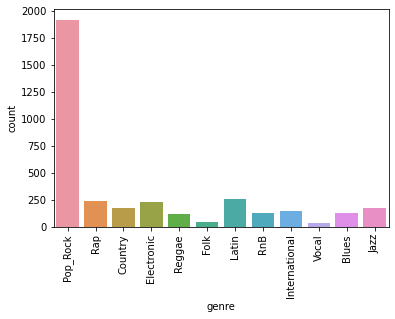

In [24]:
sns.countplot(x=df.genre) # plot the categories
plt.xticks(rotation=90);

In [25]:
df.genre.value_counts()

Pop_Rock         1919
Latin             256
Rap               236
Electronic        227
Country           174
Jazz              172
International     147
RnB               132
Blues             126
Reggae            120
Folk               48
Vocal              36
Name: genre, dtype: int64

In [26]:
df = df[~df['genre'].isin(['Folk', 'Vocal'])]

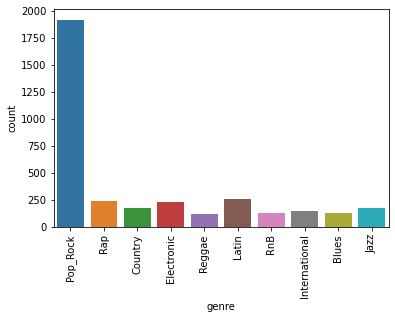

In [27]:
sns.countplot(x=df.genre) # plot the categories
plt.xticks(rotation=90);

In [28]:
# assign x and y, scale x and encode y
data = df.drop(['id','title','genre'], axis=1)
data.head()

,spectral_centroid_mean,spectral_centroid_dev,rolloff_point_mean,rolloff_point_dev,flux_mean,flux_dev,variability_mean,variability_dev,compactness_mean,compactness_dev,rms_mean,rms_dev,low_energy_window_mean,low_energy_window_dev,zero_crossing_mean,zero_crossing_dev
0,10.30,5.09,0.07,0.05,0.01,0.01,0.01,0.00,1591.00,186.80,0.25,0.08,0.58,0.06,32.60,13.10
1,10.30,9.55,0.07,0.08,0.00,0.00,0.00,0.00,1609.00,212.80,0.17,0.08,0.61,0.05,29.88,23.70
2,10.68,6.05,0.07,0.04,0.00,0.00,0.00,0.00,1735.00,265.20,0.08,0.07,0.57,0.09,26.56,14.11
3,8.50,6.65,0.05,0.05,0.00,0.00,0.00,0.00,1665.00,270.70,0.16,0.10,0.57,0.07,24.18,17.22
4,17.04,9.34,0.12,0.07,0.00,0.00,0.00,0.00,1629.00,201.10,0.12,0.05,0.58,0.07,46.94,18.85


In [29]:
labels = df[['genre']].copy()
labels

,genre
0,Pop_Rock
1,Rap
2,Country
3,Pop_Rock
4,Pop_Rock
5,Pop_Rock
6,Pop_Rock
7,Electronic
8,Pop_Rock
9,Pop_Rock


In [30]:
data.shape, labels.shape

((3509, 16), (3509, 1))

In [31]:
type(labels)

pandas.core.frame.DataFrame

In [32]:
y = labels[['genre']].copy() #Create an extra dataframe which will be used to address only the encoded values
y['genre_encoded'] = encoder.fit_transform(labels['genre'].values) #Using values is faster than using list

In [33]:
s = y.drop_duplicates('genre')
s

,genre,genre_encoded
0,Pop_Rock,6
1,Rap,7
2,Country,1
7,Electronic,2
18,Reggae,8
28,Latin,5
29,RnB,9
31,International,3
42,Blues,0
46,Jazz,4


In [34]:
data.columns

Index(['spectral_centroid_mean', 'spectral_centroid_dev', 'rolloff_point_mean',
       'rolloff_point_dev', 'flux_mean', 'flux_dev', 'variability_mean',
       'variability_dev', 'compactness_mean', 'compactness_dev', 'rms_mean',
       'rms_dev', 'low_energy_window_mean', 'low_energy_window_dev',
       'zero_crossing_mean', 'zero_crossing_dev'],
      dtype='object')

In [35]:
continuous_vars = ['spectral_centroid_mean', 'spectral_centroid_dev', 'rolloff_point_mean',
                   'rolloff_point_dev', 'flux_mean', 'flux_dev', 'variability_mean',
                   'variability_dev', 'compactness_mean', 'compactness_dev', 'rms_mean',
                    'rms_dev', 'low_energy_window_mean', 'low_energy_window_dev',
                    'zero_crossing_mean', 'zero_crossing_dev']
X_continuous = data[continuous_vars]
X_continuous_scaled = scaler.fit_transform(X_continuous)

data[continuous_vars] = X_continuous_scaled
data.head()

,spectral_centroid_mean,spectral_centroid_dev,rolloff_point_mean,rolloff_point_dev,flux_mean,flux_dev,variability_mean,variability_dev,compactness_mean,compactness_dev,rms_mean,rms_dev,low_energy_window_mean,low_energy_window_dev,zero_crossing_mean,zero_crossing_dev
0,0.26,-0.57,0.30,-0.35,0.77,0.36,0.99,0.09,-0.43,-0.65,1.09,-0.02,0.39,0.07,0.45,-0.56
1,0.26,0.70,0.25,0.87,-0.21,-0.07,-0.13,-0.02,-0.25,-0.14,-0.13,-0.03,1.11,-0.69,0.19,0.88
2,0.35,-0.30,0.11,-0.57,-1.16,-1.16,-1.35,-0.58,0.99,0.90,-1.33,-0.35,0.14,1.67,-0.12,-0.42
3,-0.22,-0.12,-0.33,-0.20,-0.62,-0.52,-0.20,0.54,0.30,1.01,-0.19,0.90,0.27,0.69,-0.34,0.00
4,2.02,0.64,1.96,0.32,-0.81,-0.82,-0.85,-0.98,-0.05,-0.37,-0.75,-0.87,0.50,0.46,1.81,0.22


In [36]:
x = data.copy()
x.shape, y.shape

((3509, 16), (3509, 2))

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x, y['genre_encoded'],test_size=.2,random_state =rng,
                                                    stratify=y['genre_encoded'])

In [38]:
print(f"X_train:{X_train.shape}\n X_test:{X_test.shape}\n y_train:{y_train.shape} \n y_test:{y_test.shape}")

X_train:(2807, 16)
 X_test:(702, 16)
 y_train:(2807,) 
 y_test:(702,)


In [39]:
y_train.value_counts()

6    1535
5     205
7     189
2     181
1     139
4     137
3     118
9     106
0     101
8      96
Name: genre_encoded, dtype: int64

In [40]:
# clf = LazyClassifier(verbose=0, custom_metric=None,random_state=rng)
# models,predictions = clf.fit(X_train, X_test, y_train, y_test)
# models

In [89]:
# Apply SMOTE to the training set
smote = SMOTE(sampling_strategy='not majority',random_state=rng)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [86]:
print(f"X_train_smote:{X_train_smote.shape}\n y_train_smote:{y_train_smote.shape}")

X_train_smote:(15350, 16)
 y_train_smote:(15350,)


In [91]:
type(y_train_smote)

pandas.core.series.Series

In [90]:
y_train_smote.value_counts()

6    1535
4    1535
0    1535
1    1535
5    1535
3    1535
9    1535
2    1535
8    1535
7    1535
Name: genre_encoded, dtype: int64

In [80]:
undersample = RandomUnderSampler(sampling_strategy='majority',random_state=rng)
X_train_rus, y_train_rus = undersample.fit_resample(X_train, y_train)

In [81]:
print(f"X_train_rus:{X_train_rus.shape}\n y_train_rus:{y_train_rus.shape}")

X_train_rus:(1368, 16)
 y_train_rus:(1368,)


In [82]:
y_train_rus.value_counts()

5    205
7    189
2    181
1    139
4    137
3    118
9    106
0    101
6     96
8     96
Name: genre_encoded, dtype: int64

In [48]:
# clf2 = LazyClassifier(verbose=0, custom_metric=None,random_state=rng)
# models2,predictions2 = clf2.fit(X_train_smote, X_test, y_train_smote, y_test)
# models2

In [49]:
# clf3 = LazyClassifier(verbose=0, custom_metric=None,random_state=rng)
# models3,predictions3 = clf2.fit(X_train_rus, X_test, y_train_rus, y_test)
# models3

<b> Using imbalance Dataset</b>

In [50]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [51]:
# create an instance of each classification algorithm
# g=GaussianNB()
# b=BernoulliNB()
KN=KNeighborsClassifier()
D=DecisionTreeClassifier(random_state=rng)
rf = RandomForestClassifier(class_weight='balanced',random_state=rng)
XGB=XGBClassifier(random_state=rng)

# algos=[g,b,KN,D,rf,XGB]
algos=[KN,D,rf,XGB]
algo_names=['KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','XGBClassifier']
   
accuracy_scored=[]
f1score = []
#(X_train, X_test, y_train, y_test)    
# fit and predict for each Algo
for item in algos:
    item.fit(X_train,y_train)
    item.predict(X_test)
    accuracy_scored.append(accuracy_score(y_test,item.predict(X_test)))
    f1score.append(f1_score(y_test,item.predict(X_test),average='weighted'))

In [52]:
# show results in a DataFrame
result = pd.DataFrame({"Accuracy" : accuracy_scored,"f1score" : f1score})
result['Algos']=algo_names
result.sort_values('Accuracy',ascending=False)

,Accuracy,f1score,Algos
2,0.56,0.46,RandomForestClassifier
3,0.55,0.49,XGBClassifier
0,0.50,0.46,KNeighborsClassifier
1,0.42,0.42,DecisionTreeClassifier


<b> Using Smote Train Data</b>

In [106]:
# gsm=GaussianNB()
# bsm=BernoulliNB()
KNsm=KNeighborsClassifier()
Dsm=DecisionTreeClassifier(random_state=rng)
rfsm = RandomForestClassifier(class_weight='balanced',random_state=rng)
XGBsm=XGBClassifier(random_state=rng)

# algosSm=[gsm,bsm,KNsm,Dsm,rfsm,XGBsm]
algosSm=[KNsm,Dsm,rfsm,XGBsm]

algo_names=['KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','XGBClassifier']

accuracy_scored_smote=[]
f1_score_smote=[]
accuracytrain = []

for item in algosSm:
    item.fit(X_train_smote,y_train_smote)
    item.predict(X_test)
    accuracy_scored_smote.append(accuracy_score(y_test,item.predict(X_test)))
    f1_score_smote.append(f1_score(y_test,item.predict(X_test),average='weighted'))
    accuracytrain.append(accuracy_score(y_train_smote,item.predict(X_train_smote)))

In [107]:
# show results after smote in a DataFrame
print("show results after smote in a DataFrame \n")
resultsmote = pd.DataFrame({"Accuracytrain":accuracytrain,"Accuracy_smote" : accuracy_scored_smote,"f1score_smote" : f1_score_smote})
resultsmote['Algos']=algo_names
resultsmote.sort_values('Accuracy_smote',ascending=False)

show results after smote in a DataFrame 



,Accuracytrain,Accuracy_smote,f1score_smote,Algos
3,1.00,0.45,0.47,XGBClassifier
2,1.00,0.43,0.46,RandomForestClassifier
1,1.00,0.33,0.37,DecisionTreeClassifier
0,0.94,0.29,0.34,KNeighborsClassifier


<b> Using Undersampling Train Data</b>

In [83]:
# gurs=GaussianNB()
# burs=BernoulliNB()
KNurs=KNeighborsClassifier()
Durs=DecisionTreeClassifier(class_weight='balanced',random_state=rng)
rfurs = RandomForestClassifier(class_weight='balanced',random_state=rng)
XGBurs=XGBClassifier(random_state=rng)

# algosUR=[gurs,burs,KNurs,Durs,rfurs,XGBurs]
algosUR=[KNurs,Durs,rfurs,XGBurs]

# algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','XGBClassifier']
algo_names=['KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','XGBClassifier']

accuracy_scored_rus=[]
f1_score_rus=[]

for item in algosUR:
    item.fit(X_train_rus,y_train_rus)
    item.predict(X_test)
    accuracy_scored_rus.append(accuracy_score(y_test,item.predict(X_test)))
    f1_score_rus.append(f1_score(y_test,item.predict(X_test),average='weighted'))

In [84]:
# show results after undersample in a DataFrame
print("show results after smote in a DataFrame \n")
resultrus = pd.DataFrame({"Accuracy_undersample" : accuracy_scored_rus,"f1score_undersample" : f1_score_rus})
resultrus['Algos']=algo_names
resultrus.sort_values('Accuracy_undersample',ascending=False)

show results after smote in a DataFrame 



,Accuracy_undersample,f1score_undersample,Algos
2,0.29,0.32,RandomForestClassifier
3,0.26,0.29,XGBClassifier
1,0.22,0.25,DecisionTreeClassifier
0,0.22,0.25,KNeighborsClassifier


<b>Using class wieghts correction for imbalanced dataset</b>

In [59]:
y_train

229     6
2445    4
3305    6
872     6
2036    6
1045    6
272     4
1152    6
808     6
652     6
2849    0
1185    1
1248    6
135     4
2046    6
44      5
3134    3
3344    6
3285    6
1173    6
2664    9
3455    2
1869    6
1943    6
1123    6
1315    6
1722    5
2602    2
988     6
662     2
176     6
361     5
243     6
3407    6
3005    2
3502    5
1519    6
3416    6
216     6
875     8
3579    6
1629    2
636     0
2323    6
358     6
2364    6
1160    3
1628    6
1084    5
684     6
2788    1
2356    6
1230    4
434     6
698     6
153     1
2626    7
1892    7
756     6
1430    7
336     1
426     4
2681    6
3253    6
1805    6
3077    6
2091    1
826     7
1578    6
1659    6
193     7
759     6
1337    1
555     6
2670    6
130     2
2567    4
1964    6
156     6
2980    2
1445    7
226     6
1808    7
784     6
1640    6
3107    6
1327    6
3361    6
2350    6
706     6
2467    6
1807    6
3440    9
857     6
2972    0
3032    6
772     6
61      6
994     3
865     0


In [60]:
type(y_train)

pandas.core.series.Series

In [61]:
y_train_labels = y_train.to_numpy().flatten()
y_train_labels

array([6, 4, 6, ..., 6, 6, 5])

In [62]:
np.unique(y_train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [63]:
from sklearn.utils import class_weight
class_weighta = class_weight.compute_class_weight(class_weight="balanced", classes = np.unique(y_train_labels), y= y_train_labels)
class_weights = dict(zip(np.unique(y_train_labels), class_weighta))
class_weights

{0: 2.779207920792079,
 1: 2.0194244604316545,
 2: 1.550828729281768,
 3: 2.378813559322034,
 4: 2.048905109489051,
 5: 1.369268292682927,
 6: 0.18286644951140066,
 7: 1.4851851851851852,
 8: 2.923958333333333,
 9: 2.6481132075471696}

In [64]:
rfcw = RandomForestClassifier(class_weight=class_weights,random_state=rng)
rfcw.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 2.779207920792079,
                                     1: 2.0194244604316545,
                                     2: 1.550828729281768, 3: 2.378813559322034,
                                     4: 2.048905109489051, 5: 1.369268292682927,
                                     6: 0.18286644951140066,
                                     7: 1.4851851851851852,
                                     8: 2.923958333333333,
                                     9: 2.6481132075471696},
                       random_state=2023)

In [65]:
rfcwaccuracy=accuracy_score(y_test,rfcw.predict(X_test))
rfcwaccuracy

0.5598290598290598

In [66]:
rfcwaccuracy

0.5598290598290598

In [67]:
rfcf1score=f1_score(y_test,rfcw.predict(X_test),average='weighted')
rfcf1score

0.4628179564878309

In [68]:
# initialize XGBoost model
xgb_cw = XGBClassifier(
    objective='multi:softmax', # set objective to multiclass classification
    num_class=10, # set number of classes
    scale_pos_weight=class_weights, # set class weights for all classes
    random_state=rng # set random seed for reproducibility
)

# train XGBoost model
xgb_cw.fit(X_train, y_train)

[15:55:04] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_class=10, num_parallel_tree=1,
              objective='multi:softmax', predictor='auto', random_state=2023, ...)

In [69]:
xgbaccuracy = accuracy_score(y_test,xgb_cw .predict(X_test))
xgbaccuracy

0.5498575498575499

In [70]:
xgbf1score=f1_score(y_test,xgb_cw.predict(X_test),average='weighted')
xgbf1score

0.4854831027785226

In [71]:
Dcw = DecisionTreeClassifier(class_weight=class_weights,random_state=rng)
Dcw.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 2.779207920792079,
                                     1: 2.0194244604316545,
                                     2: 1.550828729281768, 3: 2.378813559322034,
                                     4: 2.048905109489051, 5: 1.369268292682927,
                                     6: 0.18286644951140066,
                                     7: 1.4851851851851852,
                                     8: 2.923958333333333,
                                     9: 2.6481132075471696},
                       random_state=2023)

In [72]:
Dcwaccuracy = accuracy_score(y_test,Dcw.predict(X_test))
Dcwaccuracy

0.4017094017094017

In [73]:
Dcwf1score=f1_score(y_test,Dcw.predict(X_test),average='weighted')
Dcwf1score

0.40893476660399547

In [74]:
X_train.shape

(2807, 16)

In [75]:
y_train.shape

(2807,)

In [76]:
# initialize k-NN model
# apply class weights to training data
X_train_weighted = np.multiply(X_train, np.array([class_weights[y] for y in y_train]).reshape(-1,1))
knncw = KNeighborsClassifier(weights='distance')

# fit k-NN model to training data with class weights
knncw.fit(X_train_weighted, y_train)

KNeighborsClassifier(weights='distance')

In [77]:
knnaccuracy = accuracy_score(y_test,knncw.predict(X_test))
knnaccuracy

0.3176638176638177

In [78]:
knnf1score=f1_score(y_test,knncw.predict(X_test),average='weighted')
knnf1score

0.33422736905379535

In [79]:
resultcw = pd.DataFrame({"Accuracy_classweights" : [rfcwaccuracy,xgbaccuracy,Dcwaccuracy,knnaccuracy],"f1score_classweights" : [rfcf1score,xgbf1score,Dcwf1score,knnf1score]})
resultcw['Algos']=algo_names=['RandomForestClassifier','XGBClassifier','DecisionTreeClassifier','KNeighborsClassifier']
resultcw.sort_values('Accuracy_classweights',ascending=False)

,Accuracy_classweights,f1score_classweights,Algos
0,0.56,0.46,RandomForestClassifier
1,0.55,0.49,XGBClassifier
2,0.40,0.41,DecisionTreeClassifier
3,0.32,0.33,KNeighborsClassifier


<b>Using oversampler in imbalance dataset</b>

In [93]:
from imblearn.over_sampling import RandomOverSampler

In [100]:
s = y.drop_duplicates('genre')
s

,genre,genre_encoded
0,Pop_Rock,6
1,Rap,7
2,Country,1
7,Electronic,2
18,Reggae,8
28,Latin,5
29,RnB,9
31,International,3
42,Blues,0
46,Jazz,4


In [101]:
desired_samples = 1919

# sampling_strategy = {
#     'Blues': desired_samples,
#     'Country': desired_samples,
#     'Electronic': desired_samples,
#  #   'Folk': desired_samples,
#     'International': desired_samples,
#     'Jazz': desired_samples,
#     'Latin': desired_samples,
#     'Pop_Rock': desired_samples,
#     'Rap': desired_samples,
#     'Reggae': desired_samples,
#     'RnB': desired_samples,
#    # 'Vocal': desired_samples
# }

sampling_strategys = {
    0 : desired_samples,
    1: desired_samples,
    2 : desired_samples,
 #   'Folk': desired_samples,
    3: desired_samples,
    4: desired_samples,
   5: desired_samples,
    6: desired_samples,
    7: desired_samples,
    8: desired_samples,
    9: desired_samples,
   # 'Vocal': desired_samples
}
ros = RandomOverSampler(sampling_strategy=sampling_strategys,random_state=2023)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [102]:
print(f"X_train_rus:{X_train_ros.shape}\n y_train_rus:{y_train_ros.shape}")

X_train_rus:(19190, 16)
 y_train_rus:(19190,)


In [103]:
y_train_ros.value_counts()

6    1919
4    1919
0    1919
1    1919
5    1919
3    1919
9    1919
2    1919
8    1919
7    1919
Name: genre_encoded, dtype: int64

In [104]:
KNros=KNeighborsClassifier()
Duros=DecisionTreeClassifier(class_weight='balanced',random_state=rng)
rfros = RandomForestClassifier(class_weight='balanced',random_state=rng)
XGBros=XGBClassifier(random_state=rng)

algosUR=[KNros,Duros,rfros,XGBros]

algo_names=['KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','XGBClassifier']

accuracy_scored_ros=[]
f1_score_ros=[]

for item in algosUR:
    item.fit(X_train_ros,y_train_ros)
    item.predict(X_test)
    accuracy_scored_ros.append(accuracy_score(y_test,item.predict(X_test)))
    f1_score_ros.append(f1_score(y_test,item.predict(X_test),average='weighted'))

In [105]:
# show results after undersample in a DataFrame
print("show results after smote in a DataFrame \n")
resultrus = pd.DataFrame({"Accuracy_oversample" : accuracy_scored_ros,"f1score_oversample" : f1_score_ros})
resultrus['Algos']=algo_names
resultrus.sort_values('Accuracy_oversample',ascending=False)

show results after smote in a DataFrame 



,Accuracy_oversample,f1score_oversample,Algos
2,0.55,0.49,RandomForestClassifier
3,0.51,0.48,XGBClassifier
1,0.41,0.42,DecisionTreeClassifier
0,0.35,0.39,KNeighborsClassifier
